#### **Name** : `Mamunur Islam `
#### **Roll No.** : `2410031386`
#### **Class** : `2CSE22`
#### **Subject** : `Machine Learning`

## Import the libraries

In [ ]:
import pandas as pd
import numpy as np

## Import the dataset
We have imported the titanic dataset for the further EDA(Exploratory Data Analysis).

In [ ]:
df = pd.read_csv('/content/test.csv') # Import the data from the location
df.head() # Prints the first 5 rows of the dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.info() # Provides the information about the dataset.
# Information like columns, data types, data entries(rows), and non-null count.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [ ]:
df.describe() # Provides the statistical information about the dataset

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df.shape # Shape of the dataset (rows, columns)

(418, 11)

In [ ]:
df.value_counts().sum() # Calculates the counts of unique values in the dataset

np.int64(87)

In [ ]:
df.isnull().sum() # Calculates the number null values in the dataset for each columns.

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [ ]:
# Since 'Cabin' column contains 327 null values in the dataset 418 data entries, we don't require it in the dataset.
# Dropping the column is the best option.
df = df.drop(['Cabin'], axis=1)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
# Now, we need to fill the other missing values in the dataset.
# For 'Age' column, we need to fill the rows with a median age.
df['Age'] = df['Age'].fillna(df['Age'].median())
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
# For 'Embarked' column, we need to fill the 2 data entries with the mode of all the values in the column.
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
df.isnull().sum() # Recheck for the null values

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1
Embarked,0


In [ ]:
df.duplicated().sum() # Calculates the number of duplicates in the dataset

np.int64(0)

# Machine Learning Assignment:
## Data Preprocessing - Data Cleaning (for Group-2)

**Task**: *Data Cleaning of the dataset **Building_Permits.csv**.*

* Name: `Mamunur Islam`
* Roll no.: `2410031386`
* Section: `2CSE22`


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/Building_Permits.csv', low_memory=False)
df.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1.380611e+12
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1.420164e+12
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1.424857e+12
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1.443574e+12
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",1.445482e+11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5345 entries, 0 to 5344
Data columns (total 43 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Permit Number                           5345 non-null   object 
 1   Permit Type                             5345 non-null   int64  
 2   Permit Type Definition                  5345 non-null   object 
 3   Permit Creation Date                    5345 non-null   object 
 4   Block                                   5345 non-null   object 
 5   Lot                                     5345 non-null   object 
 6   Street Number                           5345 non-null   int64  
 7   Street Number Suffix                    52 non-null     object 
 8   Street Name                             5345 non-null   object 
 9   Street Suffix                           5284 non-null   object 
 10  Unit                                    717 non-null    floa

In [ ]:
df.isnull().sum()

,0
Permit Number,0
Permit Type,0
Permit Type Definition,0
Permit Creation Date,0
Block,0
Lot,0
Street Number,0
Street Number Suffix,5293
Street Name,0
Street Suffix,61


### Dropping the columns
 Columns like `Street Number Suffix`, `Unit Suffix`, `Structural Notification`, `Voluntary Soft-Story Retrofit`, `TIDF Compliance` and `Site Permit` are >= 95% empty or filled with null values.

 I am going to drop from the dataset for better and cleaned data.

In [ ]:
df = df.drop(columns=['Street Number Suffix', 'Unit Suffix', 'Structural Notification', 'Voluntary Soft-Story Retrofit', 'TIDF Compliance', 'Site Permit'], axis=1)
df.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Unit,...,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,St,NaN,...,2.0,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1.380611e+12
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,St,0.0,...,2.0,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1.420164e+12
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,Av,NaN,...,2.0,1.0,constr type 1,1.0,constr type 1,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1.424857e+12
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,Av,0.0,...,2.0,5.0,wood frame (5),5.0,wood frame (5),3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1.443574e+12
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,St,NaN,...,2.0,3.0,constr type 3,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",1.445482e+11


In [ ]:
df.info() # Columns has been decreased from 43 to 37.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5345 entries, 0 to 5344
Data columns (total 37 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Permit Number                           5345 non-null   object 
 1   Permit Type                             5345 non-null   int64  
 2   Permit Type Definition                  5345 non-null   object 
 3   Permit Creation Date                    5345 non-null   object 
 4   Block                                   5345 non-null   object 
 5   Lot                                     5345 non-null   object 
 6   Street Number                           5345 non-null   int64  
 7   Street Name                             5345 non-null   object 
 8   Street Suffix                           5284 non-null   object 
 9   Unit                                    717 non-null    float64
 10  Description                             5339 non-null   obje

### Converting columns data type

* `object` -> `datetime` for **Dates**.

In [ ]:
date_columns = ['Permit Creation Date', 'Current Status Date', 'Filed Date', 'Issued Date', 'Completed Date', 'First Construction Document Date', 'Permit Expiration Date']
for column in date_columns:
  df[column] = pd.to_datetime(df[column], errors='coerce')

df.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Unit,...,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,2015-05-06,0326,023,140,Ellis,St,NaN,...,2.0,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1.380611e+12
1,201604195146,4,sign - erect,2016-04-19,0306,007,440,Geary,St,0.0,...,2.0,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1.420164e+12
2,201605278609,3,additions alterations or repairs,2016-05-27,0595,203,1647,Pacific,Av,NaN,...,2.0,1.0,constr type 1,1.0,constr type 1,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1.424857e+12
3,201611072166,8,otc alterations permit,2016-11-07,0156,011,1230,Pacific,Av,0.0,...,2.0,5.0,wood frame (5),5.0,wood frame (5),3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1.443574e+12
4,201611283529,6,demolitions,2016-11-28,0342,001,950,Market,St,NaN,...,2.0,3.0,constr type 3,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",1.445482e+11


In [ ]:
df.dtypes

,0
Permit Number,object
Permit Type,int64
Permit Type Definition,object
Permit Creation Date,datetime64[ns]
Block,object
Lot,object
Street Number,int64
Street Name,object
Street Suffix,object
Unit,float64


### Standardize Column Names
Removing the whitespaces and turning into lowercase letters.

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns

Index(['permit_number', 'permit_type', 'permit_type_definition',
       'permit_creation_date', 'block', 'lot', 'street_number', 'street_name',
       'street_suffix', 'unit', 'description', 'current_status',
       'current_status_date', 'filed_date', 'issued_date', 'completed_date',
       'first_construction_document_date', 'number_of_existing_stories',
       'number_of_proposed_stories', 'fire_only_permit',
       'permit_expiration_date', 'estimated_cost', 'revised_cost',
       'existing_use', 'existing_units', 'proposed_use', 'proposed_units',
       'plansets', 'existing_construction_type',
       'existing_construction_type_description', 'proposed_construction_type',
       'proposed_construction_type_description', 'supervisor_district',
       'neighborhoods_-_analysis_boundaries', 'zipcode', 'location',
       'record_id'],
      dtype='object')

### Checking for the duplicates

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.head()

,permit_number,permit_type,permit_type_definition,permit_creation_date,block,lot,street_number,street_name,street_suffix,unit,...,plansets,existing_construction_type,existing_construction_type_description,proposed_construction_type,proposed_construction_type_description,supervisor_district,neighborhoods_-_analysis_boundaries,zipcode,location,record_id
0,201505065519,4,sign - erect,2015-05-06,0326,023,140,Ellis,St,NaN,...,2.0,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1.380611e+12
1,201604195146,4,sign - erect,2016-04-19,0306,007,440,Geary,St,0.0,...,2.0,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1.420164e+12
2,201605278609,3,additions alterations or repairs,2016-05-27,0595,203,1647,Pacific,Av,NaN,...,2.0,1.0,constr type 1,1.0,constr type 1,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1.424857e+12
3,201611072166,8,otc alterations permit,2016-11-07,0156,011,1230,Pacific,Av,0.0,...,2.0,5.0,wood frame (5),5.0,wood frame (5),3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1.443574e+12
4,201611283529,6,demolitions,2016-11-28,0342,001,950,Market,St,NaN,...,2.0,3.0,constr type 3,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",1.445482e+11


In [ ]:
df.dtypes

,0
permit_number,object
permit_type,int64
permit_type_definition,object
permit_creation_date,datetime64[ns]
block,object
lot,object
street_number,int64
street_name,object
street_suffix,object
unit,float64


### Converting column datatypes

* `float64` -> `int64`
* `object` -> `float64`  

In [ ]:
numeric_columns = ['permit_type', 'street_number', 'unit', 'number_of_existing_stories', 'number_of_proposed_stories', 'estimated_cost', 'revised_cost', 'existing_units', 'proposed_units', 'plansets', 'existing_construction_type', 'proposed_construction_type', 'supervisor_district', 'zipcode', 'record_id']

for column in numeric_columns:
  df[column] = pd.to_numeric(df[column], errors='coerce')

df.dtypes

,0
permit_number,object
permit_type,int64
permit_type_definition,object
permit_creation_date,datetime64[ns]
block,object
lot,object
street_number,int64
street_name,object
street_suffix,object
unit,float64


### Categorize the columns
Categorizing the columns into *numerical columns* and *categorical columns*.

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.to_list()
numerical_columns

['permit_type',
 'street_number',
 'unit',
 'number_of_existing_stories',
 'number_of_proposed_stories',
 'estimated_cost',
 'revised_cost',
 'existing_units',
 'proposed_units',
 'plansets',
 'existing_construction_type',
 'proposed_construction_type',
 'supervisor_district',
 'zipcode',
 'record_id']

In [ ]:
categorical_columns = df.select_dtypes(include='object').columns.to_list()
categorical_columns

['permit_number',
 'permit_type_definition',
 'block',
 'lot',
 'street_name',
 'street_suffix',
 'description',
 'current_status',
 'fire_only_permit',
 'existing_use',
 'proposed_use',
 'existing_construction_type_description',
 'proposed_construction_type_description',
 'neighborhoods_-_analysis_boundaries',
 'location']

### Filling the Missing Values

* Use of SimpleImputer from sklearn.impute
* pd.fillna() for the datetime columns.

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = imputer.fit_transform(df[categorical_columns])
df[categorical_columns].head()

,permit_number,permit_type_definition,block,lot,street_name,street_suffix,description,current_status,fire_only_permit,existing_use,proposed_use,existing_construction_type_description,proposed_construction_type_description,neighborhoods_-_analysis_boundaries,location
0,201505065519,sign - erect,0326,023,Ellis,St,"ground fl facade: to erect illuminated, electr...",expired,Y,tourist hotel/motel,1 family dwelling,constr type 3,wood frame (5),Tenderloin,"(37.785719256680785, -122.40852313194863)"
1,201604195146,sign - erect,0306,007,Geary,St,remove (e) awning and associated signs.,issued,Y,tourist hotel/motel,1 family dwelling,constr type 3,wood frame (5),Tenderloin,"(37.78733980600732, -122.41063199757738)"
2,201605278609,additions alterations or repairs,0595,203,Pacific,Av,installation of separating wall,withdrawn,Y,retail sales,retail sales,constr type 1,constr type 1,Russian Hill,"(37.7946573324287, -122.42232562979227)"
3,201611072166,otc alterations permit,0156,011,Pacific,Av,repair dryrot & stucco at front of bldg.,complete,Y,1 family dwelling,1 family dwelling,wood frame (5),wood frame (5),Nob Hill,"(37.79595867909168, -122.41557405519474)"
4,201611283529,demolitions,0342,001,Market,St,demolish retail/office/commercial 3-story buil...,issued,Y,retail sales,1 family dwelling,constr type 3,wood frame (5),Tenderloin,"(37.78315261897309, -122.40950883997789)"


In [ ]:
df[categorical_columns].isnull().sum()

,0
permit_number,0
permit_type_definition,0
block,0
lot,0
street_name,0
street_suffix,0
description,0
current_status,0
fire_only_permit,0
existing_use,0


In [ ]:
imputer_1 = SimpleImputer(strategy='mean')
df[['plansets']] = imputer_1.fit_transform(df[['plansets']])
df['plansets'].isnull().sum()

np.int64(0)

In [ ]:
df['plansets']

,plansets
0,2.000000
1,2.000000
2,2.000000
3,2.000000
4,2.000000
...,...
5340,2.000000
5341,0.000000
5342,0.000000
5343,0.000000


In [ ]:
numerical_columns

['permit_type',
 'street_number',
 'unit',
 'number_of_existing_stories',
 'number_of_proposed_stories',
 'estimated_cost',
 'revised_cost',
 'existing_units',
 'proposed_units',
 'plansets',
 'existing_construction_type',
 'proposed_construction_type',
 'supervisor_district',
 'zipcode',
 'record_id']

In [ ]:
del numerical_columns[-2:len(numerical_columns)]
numerical_columns

['permit_type',
 'street_number',
 'unit',
 'number_of_existing_stories',
 'number_of_proposed_stories',
 'estimated_cost',
 'revised_cost',
 'existing_units',
 'proposed_units',
 'plansets',
 'existing_construction_type',
 'proposed_construction_type',
 'supervisor_district']

In [ ]:
del numerical_columns[9]
numerical_columns

['permit_type',
 'street_number',
 'unit',
 'number_of_existing_stories',
 'number_of_proposed_stories',
 'estimated_cost',
 'revised_cost',
 'existing_units',
 'proposed_units',
 'existing_construction_type',
 'proposed_construction_type',
 'supervisor_district']

In [ ]:
imputer_2 = SimpleImputer(strategy='median')
df[numerical_columns] = imputer_2.fit_transform(df[numerical_columns])
df[numerical_columns].isnull().sum()

,0
permit_type,0
street_number,0
unit,0
number_of_existing_stories,0
number_of_proposed_stories,0
estimated_cost,0
revised_cost,0
existing_units,0
proposed_units,0
existing_construction_type,0


In [ ]:
df[['zipcode']] = imputer.fit_transform(df[['zipcode']])
df['zipcode'].isnull().sum()

np.int64(0)

In [ ]:
df.zipcode

,zipcode
0,94102.0
1,94102.0
2,94109.0
3,94109.0
4,94102.0
...,...
5340,94124.0
5341,94118.0
5342,94131.0
5343,94117.0


In [ ]:
df[['filed_date', 'estimated_cost']]

,filed_date,estimated_cost
0,2015-05-06,4000.0
1,2016-04-19,1.0
2,2016-05-27,20000.0
3,2016-11-07,2000.0
4,2016-11-28,100000.0
...,...,...
5340,2013-02-26,58195.0
5341,2013-02-26,7000.0
5342,2013-02-26,1800.0
5343,2013-02-26,9120.0


In [ ]:
df['issued_date'] = df['issued_date'].fillna(df['filed_date'] + pd.Timedelta(days=30))
df.issued_date

,issued_date
0,2015-11-09
1,2017-08-03
2,2016-06-26
3,2017-07-18
4,2017-12-01
...,...
5340,2013-03-04
5341,2013-02-26
5342,2013-02-26
5343,2013-02-26


In [ ]:
duration = (df['completed_date'] - df['issued_date']).dt.days
median_duration = duration.median()

df['completed_date'] = df.completed_date.fillna(df.issued_date + pd.Timedelta(days=median_duration))
df['completed_date']

,completed_date
0,2016-02-09
1,2017-11-03
2,2016-09-26
3,2017-07-24
4,2018-03-03
...,...
5340,2014-01-31
5341,2013-03-05
5342,2014-10-29
5343,2013-04-25


In [ ]:
duration = (df['completed_date'] - df['issued_date']).dt.days
median_duration = duration.median()

df['completed_date'] = df.completed_date.fillna(df.issued_date + pd.Timedelta(days=median_duration))
df['completed_date']

,completed_date
0,2016-02-09
1,2017-11-03
2,2016-09-26
3,2017-07-24
4,2018-03-03
...,...
5340,2014-01-31
5341,2013-03-05
5342,2014-10-29
5343,2013-04-25


In [ ]:
gap = (df['first_construction_document_date'] - df['filed_date']).dt.days
median_gap = gap.median()

df['first_construction_document_date'] = df['first_construction_document_date'].fillna(df['filed_date'] + pd.Timedelta(days=median_gap))
df['first_construction_document_date'].head()

,first_construction_document_date
0,2015-11-09
1,2017-08-03
2,2016-05-27
3,2017-07-18
4,2017-11-20


In [ ]:
df['permit_expiration_date'] = df['permit_expiration_date'].fillna(df['issued_date'] + pd.Timedelta(days=365))
df['permit_expiration_date'].head()

,permit_expiration_date
0,2016-11-03
1,2017-12-03
2,2017-06-26
3,2018-07-13
4,2018-12-01


In [ ]:
df.isnull().sum()

,0
permit_number,0
permit_type,0
permit_type_definition,0
permit_creation_date,0
block,0
lot,0
street_number,0
street_name,0
street_suffix,0
unit,0


# Machine Learning Class - 03
## Linear Regression
We are going to learn to apply `Linear Regression Machine Learning Algorithm` on the dataset to predict the target values from the features.

* We are going to import `LinearRegression()` from `sklearn.linear_model`.
* We have to use `.fit` and `.predict`.

In [ ]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [ ]:
# Create a synthentic dataset
num_samples = 5
area = np.random.uniform(350, 2400, num_samples)
base_price = 40000
price_per_sqft = 150
noise = np.random.normal(0, 1500, num_samples)
price = base_price + (area * price_per_sqft) + noise
price = np.round(price, 2)

In [ ]:
df = pd.DataFrame({'Area' : area, 'Price' : price})
df.head()

,Area,Price
0,2298.624696,384224.89
1,1555.442487,272311.07
2,845.532503,168448.62
3,2240.868296,376634.39
4,1941.043886,331559.80


In [ ]:
X = df['Area'].values.reshape(-1, 1)
y = df['Price'].values

In [ ]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
y_predict = model.predict(X)

/tmp/ipython-input-869510692.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


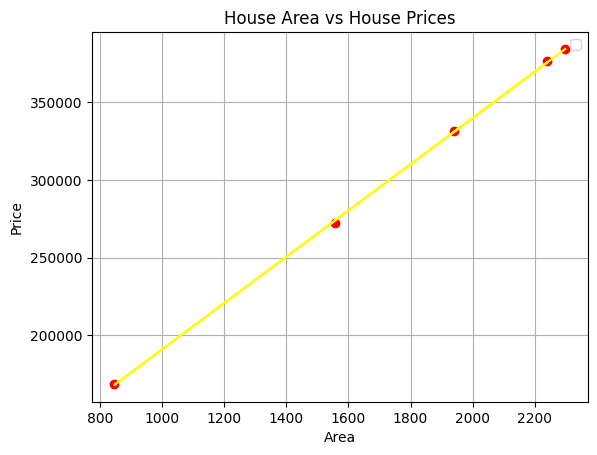

In [ ]:
plt.scatter(X, y, color='red')
plt.plot(X, y_predict, color='yellow')
plt.title("House Area vs House Prices")
plt.xlabel('Area')
plt.ylabel('Price')
plt.grid()
plt.legend()
plt.show()

In [ ]:
model.coef_[0], model.intercept_

(np.float64(149.10467378715762), np.float64(41780.768013004854))

## Machine Learning Class - 04

# Logistic Regression
We are going to learn to apply `Logistic Regression Algorithm` on the dataset to predict the target values through features.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

In [ ]:
breast_cancer = load_breast_cancer(as_frame=True)
df = breast_cancer.frame
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df["target"]

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [ ]:
y = df["target"].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
X = df.drop("target", axis=1).values


In [ ]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [ ]:
model = LogisticRegression(max_iter=10000, random_state=0)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
acc_score = accuracy_score(y_test, y_predict) * 100
acc_score

95.6140350877193

In [ ]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[39,  4],
       [ 1, 70]])

In [ ]:
class_report = classification_report(y_test, y_predict)
class_report

'              precision    recall  f1-score   support\n\n           0       0.97      0.91      0.94        43\n           1       0.95      0.99      0.97        71\n\n    accuracy                           0.96       114\n   macro avg       0.96      0.95      0.95       114\nweighted avg       0.96      0.96      0.96       114\n'

# Machine Learning Class
### Day - 4 : Logistic Regression [25 August 2025]

We are going to apply Logisitic Regression Algorithm on the dataset.

* Use of inbuilt datasets: `load_wine`, `load_breat_cancer`
* Apply `LogisticRegression` on the datasets.
* Use of `StandardScaler` for preprocessing.
* Use of metrics: `accuracy_score`, `confusion_matrix`, `classification_report`.

In [ ]:
from sklearn.datasets import load_wine, load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

## 1. Wine Dataset

In [ ]:
wine_data = load_wine(as_frame=True)
df = wine_data.frame
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
y = df.target.values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
X = df.drop("target", axis=1).values
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [ ]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=100))
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
y_predict = pipe.predict(X_test)

In [ ]:
acc_score = accuracy_score(y_test, y_predict) * 100
acc_score

100.0

In [ ]:
cf_matrix = confusion_matrix(y_test, y_predict)
cf_matrix

array([[14,  0,  0],
       [ 0, 14,  0],
       [ 0,  0,  8]])

<Axes: >

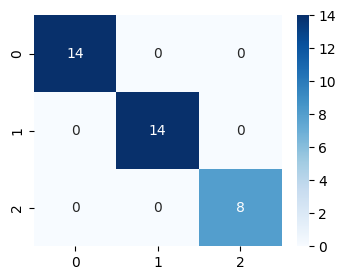

In [ ]:
plt.figure(figsize=(4, 3))
sns.heatmap(cf_matrix, annot=True, cmap='Blues')

<Axes: >

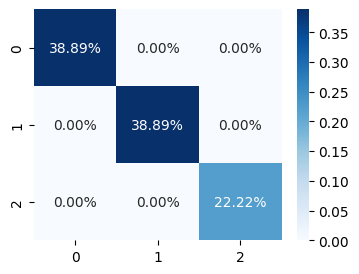

In [ ]:
plt.figure(figsize=(4, 3))
sns.heatmap(cf_matrix/np.sum(cf_matrix), fmt='.2%', annot=True, cmap='Blues')

In [ ]:
report = classification_report(y_test, y_predict, target_names= wine_data.target_names, output_dict=True)
report = pd.DataFrame(report).T
report

,precision,recall,f1-score,support
class_0,1.0,1.0,1.0,14.0
class_1,1.0,1.0,1.0,14.0
class_2,1.0,1.0,1.0,8.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,36.0
weighted avg,1.0,1.0,1.0,36.0


## 2. Breast Cancer Dataset

In [ ]:
breast_cancer = load_breast_cancer(as_frame=True)
df = breast_cancer.frame
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
y = df['target'].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
X = df.drop('target', axis=1).values
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [ ]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
acc_score = accuracy_score(y_test, y_predict) * 100
acc_score

95.6140350877193

In [ ]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000))
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=10000))])

In [ ]:
y_predict = pipe.predict(X_test)

In [ ]:
acc_score = accuracy_score(y_test, y_predict) * 100
acc_score

97.36842105263158

<Axes: >

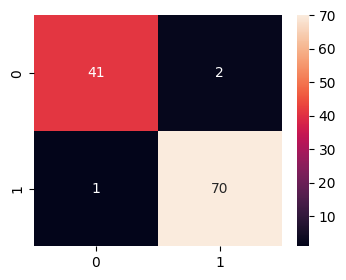

In [ ]:
cf_matrix = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(4, 3))
sns.heatmap(cf_matrix, annot=True)

<Axes: >

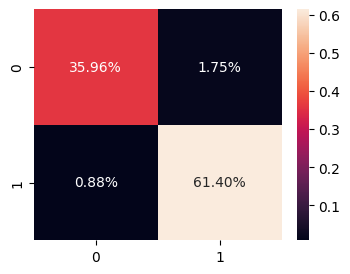

In [ ]:
plt.figure(figsize=(4, 3))
sns.heatmap(cf_matrix/np.sum(cf_matrix), fmt='.2%', annot=True)

<Axes: >

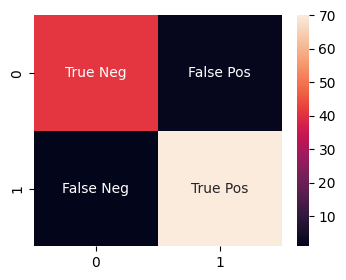

In [ ]:
plt.figure(figsize=(4, 3))
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.array(labels).reshape(2, 2)
sns.heatmap(cf_matrix, fmt='', annot=labels)

In [ ]:
report = classification_report(y_test, y_predict, target_names=breast_cancer.target_names, output_dict=True)
report = pd.DataFrame(report).T
report

,precision,recall,f1-score,support
malignant,0.976190,0.953488,0.964706,43.000000
benign,0.972222,0.985915,0.979021,71.000000
accuracy,0.973684,0.973684,0.973684,0.973684
macro avg,0.974206,0.969702,0.971863,114.000000
weighted avg,0.973719,0.973684,0.973621,114.000000


# Machine Learning Class
### Day - 4 : KNN Algorithm Implementation [19 September 2025]

We are going to apply KNN Algorithm on the image dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tarfile
import os

# Define the path to the tar.gz file in your Google Drive
tar_gz_path = '/content/testSet.tar.gz'

# Define the directory where you want to extract the contents
extract_dir = '/content/extracted_testSet'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Open the tar.gz file
with tarfile.open(tar_gz_path, 'r:gz') as tar:
    # Extract all contents to the specified directory
    tar.extractall(path=extract_dir)

print(f"Successfully extracted {tar_gz_path} to {extract_dir}")

/tmp/ipython-input-3702900839.py:16: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=extract_dir)


Successfully extracted /content/testSet.tar.gz to /content/extracted_testSet


In [ ]:
import os
import cv2
import numpy as np

# Define the path to the extracted images directory
extracted_dir = '/content/extracted_testSet'

# Initialize empty lists to store the image data and their corresponding labels
image_data = []
labels = []

# Define the target size for resizing images
target_size = (64, 64)

# Iterate through the subdirectories within the extracted directory
for class_name in os.listdir(extracted_dir):
    class_dir = os.path.join(extracted_dir, class_name)

    # Ensure it's a directory
    if os.path.isdir(class_dir):
        # Iterate through the image files within the subdirectory
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)

            # Ensure it's a file and a common image file extension
            if os.path.isfile(image_path) and image_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                # Read the image
                img = cv2.imread(image_path)

                # Check if the image was read successfully
                if img is not None:
                    # Resize the image
                    resized_img = cv2.resize(img, target_size)

                    # Flatten the resized image
                    flattened_img = resized_img.flatten()

                    # Append the flattened image data and label
                    image_data.append(flattened_img)
                    labels.append(class_name)

# Convert the image data and labels lists into NumPy arrays
image_data_np = np.array(image_data)
labels_np = np.array(labels)

print("Image loading and preprocessing complete.")
print(f"Shape of image data: {image_data_np.shape}")
print(f"Shape of labels: {labels_np.shape}")

Image loading and preprocessing complete.
Shape of image data: (28000, 12288)
Shape of labels: (28000,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image_data_np, labels_np, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (22400, 12288)
Shape of X_test: (5600, 12288)
Shape of y_train: (22400,)
Shape of y_test: (5600,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNeighborsClassifier with n_neighbors set to 5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training data
knn_model.fit(X_train, y_train)

print("KNN model training complete.")

KNN model training complete.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test data
y_pred = knn_model.predict(X_test)

In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


In [ ]:
# Select a few images from the test set for prediction
num_samples = 5
sample_indices = np.random.choice(len(X_test), num_samples, replace=False)
X_sample = X_test[sample_indices]
y_sample_true = y_test[sample_indices]

# Use the trained knn_model to predict the class labels for the selected images
y_sample_pred = knn_model.predict(X_sample)

# Compare the predicted labels with the actual labels
print("Comparing actual and predicted labels for selected samples:")
for i in range(num_samples):
    print(f"Sample {i+1}: Actual = {y_sample_true[i]}, Predicted = {y_sample_pred[i]}")

Comparing actual and predicted labels for selected samples:
Sample 1: Actual = testSet, Predicted = testSet
Sample 2: Actual = testSet, Predicted = testSet
Sample 3: Actual = testSet, Predicted = testSet
Sample 4: Actual = testSet, Predicted = testSet
Sample 5: Actual = testSet, Predicted = testSet


In [ ]:
# Select a few images from the test set for prediction
num_samples = 5
sample_indices = np.random.choice(len(X_test), num_samples, replace=False)
X_sample = X_test[sample_indices]
y_sample_true = y_test[sample_indices]

# Use the trained knn_model to predict the class labels for the selected images
y_sample_pred = knn_model.predict(X_sample)

# Compare the predicted labels with the actual labels
print("Comparing actual and predicted labels for selected samples:")
for i in range(num_samples):
    print(f"Sample {i+1}: Actual = {y_sample_true[i]}, Predicted = {y_sample_pred[i]}")

Comparing actual and predicted labels for selected samples:
Sample 1: Actual = testSet, Predicted = testSet
Sample 2: Actual = testSet, Predicted = testSet
Sample 3: Actual = testSet, Predicted = testSet
Sample 4: Actual = testSet, Predicted = testSet
Sample 5: Actual = testSet, Predicted = testSet


# Machine Learning Class
### Day - 5 : Multiple Linear Regression
Dataset: Example dataset with 3 features: Hours_Studied, Attendance, Previous_Score. Target: Final_Score.

Split: 70% train, 30% test.

Linear Regression Model: LinearRegression() from scikit-learn.

Train & Predict: Fit the model and predict final scores.

Evaluation:

Mean Squared Error (MSE): Lower is better.

R-squared Score: Measures how well features explain target variability (closer to 1 is better).

Coefficients: Shows how each feature contributes to the prediction.


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Create a sample dataset
data = {
    'Hours_Studied': [5, 3, 8, 9, 2, 7, 4, 6, 10, 1],
    'Attendance': [90, 80, 95, 85, 70, 88, 75, 92, 96, 60],
    'Previous_Score': [50, 40, 60, 65, 35, 55, 45, 60, 70, 30],
    'Final_Score': [70, 50, 85, 80, 40, 75, 60, 78, 90, 35]
}

df = pd.DataFrame(data)

# 2. Define independent variables (X) and dependent variable (y)
X = df[['Hours_Studied', 'Attendance', 'Previous_Score']]
y = df['Final_Score']

# 3. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Create the Multiple Linear Regression model
mlr = LinearRegression()

# 5. Train the model
mlr.fit(X_train, y_train)

# 6. Make predictions
y_pred = mlr.predict(X_test)

# 7. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Predicted values:", y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# 8. Display model coefficients
coeff_df = pd.DataFrame(mlr.coef_, X.columns, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coeff_df)


Predicted values: [93.06725888 55.02538071 74.89340102]
Mean Squared Error: 11.56
R-squared Score: 0.96

Model Coefficients:
                Coefficient
Hours_Studied      1.694162
Attendance         0.637056
Previous_Score     0.532995


# Machine Learning Class
### Day - 6 : Decision Tree Algorithm Implementation

We are going to apply Decision Tree Algorithm on the iris dataset.

Accuracy of Decision Tree: 100.00%


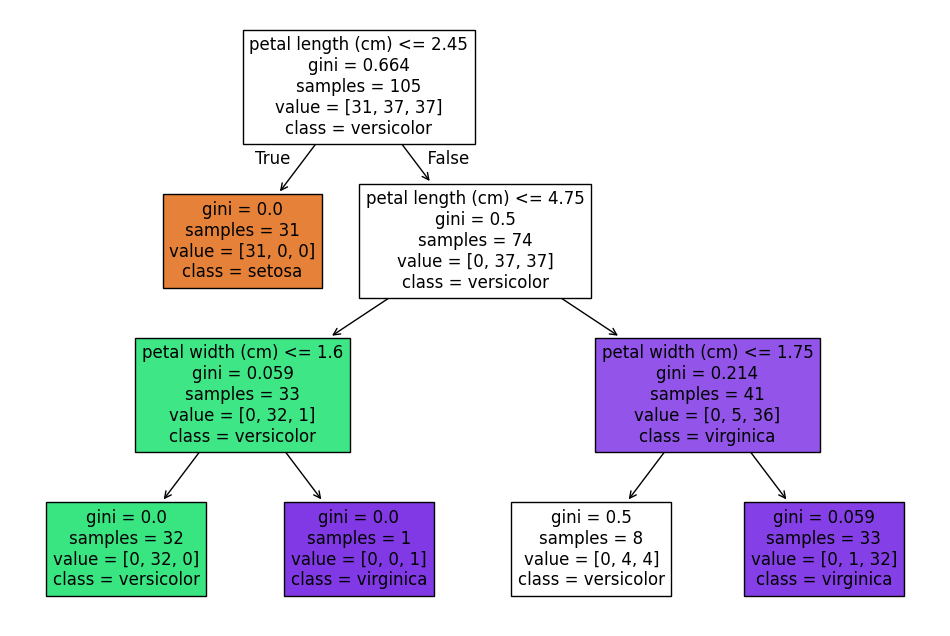

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

# 1. Load the dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Create the Decision Tree model
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# 4. Train the model
clf.fit(X_train, y_train)

# 5. Make predictions
y_pred = clf.predict(X_test)

# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree: {accuracy*100:.2f}%")

# 7. Visualize the Decision Tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


# Machine Learning Class
### Day - 7 : Navie Bayes Classification Algorithm Implementation

We are going to apply Navie Bayes Classification Algorithm on the iris dataset.

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load the dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Create the Naive Bayes model
nb_model = GaussianNB()

# 4. Train the model
nb_model.fit(X_train, y_train)

# 5. Make predictions
y_pred = nb_model.predict(X_test)

# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Naive Bayes Classifier: {accuracy*100:.2f}%\n")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy of Naive Bayes Classifier: 97.78%

Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



# Machine Learning Class
### Day - 8 : SVM Implementation Algorithm Implementation

We are going to apply Support Vector Machine Implementation Algorithm on the iris dataset.

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load the dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Create the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)  # Linear kernel

# 4. Train the model
svm_model.fit(X_train, y_train)

# 5. Make predictions
y_pred = svm_model.predict(X_test)

# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM Classifier: {accuracy*100:.2f}%\n")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy of SVM Classifier: 100.00%

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Machine Learning Class
### Day - 9 : PCA Algorithm

We are going to apply PCA Algorithm on the iris dataset. Principal Component Analysis (PCA) is used for dimensionality reduction.

Explained variance ratio of each principal component:
[0.92461872 0.05306648]


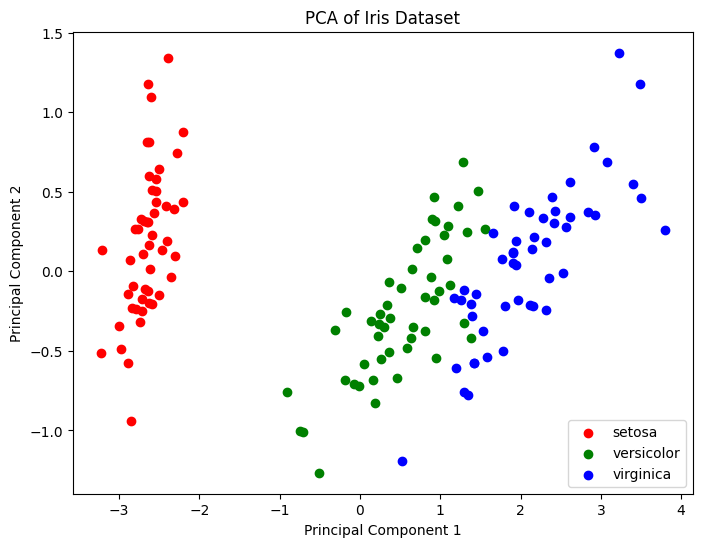

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Load the dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels
target_names = iris.target_names

# 2. Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X)

# 3. Print explained variance ratio
print("Explained variance ratio of each principal component:")
print(pca.explained_variance_ratio_)

# 4. Visualize the PCA result
plt.figure(figsize=(8,6))
colors = ['r', 'g', 'b']
for i, target_name in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name, color=colors[i])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.show()


# Machine Learning Class
### Day - 10 : Bagging Algorithm

We are going to apply Bagging Algorithm on the iris dataset.
Dataset: Iris dataset with 4 features and 3 classes.

Bagging: Combines predictions of multiple Decision Trees trained on random subsets of the data.

n_estimators: Number of trees in the ensemble (here 10).

Evaluation: Accuracy, confusion matrix, and classification report show model performance.

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load the dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Create the Bagging model
base_model = DecisionTreeClassifier()  # Base estimator
bagging_model = BaggingClassifier(estimator=base_model, n_estimators=10, random_state=42)

# 4. Train the model
bagging_model.fit(X_train, y_train)

# 5. Make predictions
y_pred = bagging_model.predict(X_test)

# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Bagging Classifier: {accuracy*100:.2f}%\n")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy of Bagging Classifier: 100.00%

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Machine Learning Class
### Day - 11 : Boosting Algorithm

We are going to apply Boosting Algorithm on the iris dataset.
Dataset: Using Iris dataset (4 features, 3 classes).

AdaBoost: Sequentially trains weak learners (here shallow Decision Trees) and adjusts weights to focus on misclassified samples.

Base Estimator: A weak learner (max_depth=1 Decision Tree).

n_estimators: Number of weak learners (here 50).

Train & Predict: Fit the AdaBoost model and predict on test data.

Evaluation: Accuracy, confusion matrix, and classification report measure performance.

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load the dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Create the Boosting (AdaBoost) model
base_model = DecisionTreeClassifier(max_depth=1)  # Weak learner
boosting_model = AdaBoostClassifier(estimator=base_model, n_estimators=50, learning_rate=1.0, random_state=42)

# 4. Train the model
boosting_model.fit(X_train, y_train)

# 5. Make predictions
y_pred = boosting_model.predict(X_test)

# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of AdaBoost Classifier: {accuracy*100:.2f}%\n")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy of AdaBoost Classifier: 100.00%

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Machine Learning Class
### Day - 12 : DBSCAN Algorithm

We are going to apply DBSCAN Algorithm on the iris dataset.

Dataset: We generate synthetic 2D data with make_blobs.

Standardization: DBSCAN is sensitive to scale, so features are standardized.

DBSCAN Parameters:

eps: Maximum distance between two points to be considered neighbors.

min_samples: Minimum points required to form a dense region.

Fit & Predict: fit_predict assigns cluster labels; -1 indicates noise/outliers.

Visualization: Scatter plot with different colors for each cluster.

Cluster labels for each data point:
[0 0 1 2 0 2 1 2 1 1 1 2 1 1 0 1 0 2 1 1 1 1 2 0 1 0 0 2 2 1 1 1 0 1 0 1 0
 2 0 2 2 1 0 2 1 1 0 2 0 2 2 0 0 1 0 2 0 1 2 1 0 2 2 0 0 2 2 0 0 1 2 0 0 1
 1 0 0 2 1 2 1 1 0 1 2 0 0 1 2 1 0 1 0 1 1 0 0 1 0 0 2 1 2 1 1 1 1 1 2 0 2
 1 1 1 1 2 0 2 0 2 2 2 1 0 0 0 0 1 0 0 1 1 1 1 1 2 2 0 1 0 1 1 0 1 2 2 2 1
 2 1 1 0 2 0 1 2 2 0 0 1 1 0 0 0 1 0 2 1 1 1 1 1 2 1 2 2 2 1 2 2 0 1 0 2 2
 0 2 1 2 2 0 0 2 0 2 2 2 2 1 0 1 1 2 2 1 2 0 0 2 1 1 0 2 2 0 0 0 0 1 0 0 2
 0 0 1 2 0 0 2 1 1 0 1 0 2 2 0 2 0 0 0 2 2 1 0 2 2 2 0 2 0 2 0 2 2 0 2 1 0
 1 1 1 0 1 2 2 0 2 2 1 1 2 2 2 0 0 0 1 1 1 2 2 2 2 0 2 0 2 2 0 1 2 2 1 0 1
 2 1 0 0]


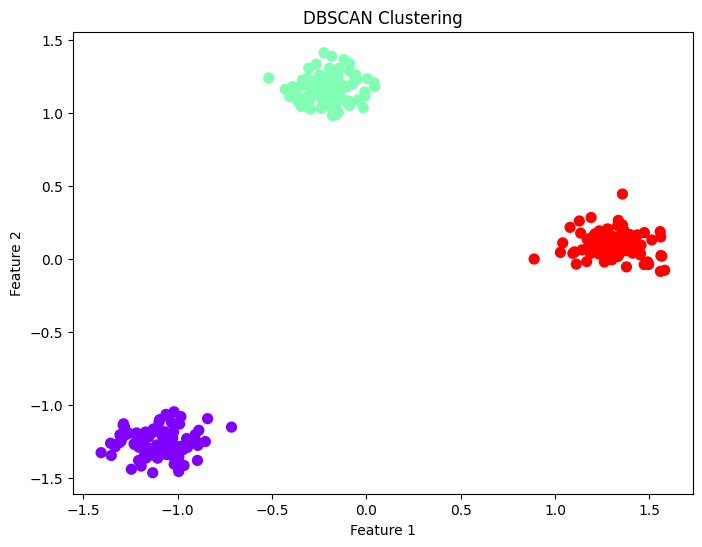

In [ ]:
# Import necessary libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Create a synthetic dataset
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=42)

# 2. Standardize features (important for DBSCAN)
X = StandardScaler().fit_transform(X)

# 3. Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps: max distance, min_samples: min points in neighborhood
clusters = dbscan.fit_predict(X)

# 4. Print cluster labels
print("Cluster labels for each data point:")
print(clusters)

# 5. Visualize the clusters
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='rainbow', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
